<a href="https://colab.research.google.com/github/poudyaldiksha/Data-Science-project/blob/main/Lesson_68_b2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lesson 68: K-Means Clustering - Elbow Method and Silhouette Score



In the previous class, we explored K-Means clustering - our first unsupervised learning algorithm. We learned how to cluster one-dimensional and two-dimensional dataset by implementing K-Means algorithm using `sklearn` library.

In this class, we will implement K-Means algorithm on **Mall Customers** dataset. We will create clusters of customers based on their age, income and spending. Also, we will learn different techniques to determine optimal number of clusters for  clustering.

Let us first understand the problem statement that we will solve today using K-Means clustering.

---

#### Problem Statement

You own a marketing company and working on formulating marketing strategies for a mall based on the customers spending patterns.

The mall has provided the consumer dataset comprising of details for 200 customers with following attributes:

|Attribute| Description
|-|-|
|CustomerID|Unique ID assigned to the customer|
|Genre|Gender of the customer|
| Age | Customer's  Age in years |
| Annual Income (k$)| Customer's annual income in multiples of thousands (USD) |
| Spending Score (1-100)| Score assigned by the mall based on customer behavior and spending nature (1-100) |

Your job is to segregate customers in different groups or clusters, so that different marketing strategies can be devised for different groups.


**Dataset Source:** https://www.kaggle.com/shwetabh123/mall-customers

---

#### Activity 1: Importing Modules and Reading Data

Let's import the necessary Python modules, read the data from a csv file to create a Pandas DataFrame and go through the necessary data-cleaning process (if required).



In [ ]:
# Import the modules, read the dataset and create a Pandas DataFrame.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

mall_df = pd.read_csv("/content/Mall_Customers.csv")
# Print the first five records
mall_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Now, let's find out the total number of rows and columns, data-types of columns and missing values (if exist) in the dataset.

In [ ]:
#  Get the total number of rows and columns, data-types of columns and missing values (if exist) in the dataset.
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


There are 200 rows and 5 columns and 0 missing (or null) values in the dataset.


We will rename the following columns for convenience:
- `Genre` to `Gender`.
- `Annual Income (k$)` to `Annual Income`.
- `Spending Score (1-100)` to `Spending Score`.



In [ ]:
# Rename 'Genre' to 'Gender', 'Annual Income (k$)' to 'Annual Income' and 'Spending Score (1-100)' to 'Spending Score'.
mall_df.rename(columns = {"Genre": "Gender"}, inplace = True)
mall_df.rename(columns = {"Annual Income (k$)": "Annual Income"}, inplace = True)
mall_df.rename(columns = {"Spending Score (1-100)": "Spending Score"}, inplace = True)

# Again print the first five records.
mall_df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


We can see that the columns have been renamed.

Let us now implement K-Means clustering based on two features `Annual Income` and `Spending Score`.




---

####Activity 2: Clustering Based on Two Features

Let's first create a subset of our dataset consisting of only two columns i.e `Annual Income` and `Spending Score`.



In [ ]:
# Create a new DataFrame consisting of two columns 'Annual Income' and 'Spending Score'
data_2d = mall_df[["Annual Income", "Spending Score"]]

# Print first 5 rows of this new DataFrame.
data_2d.head()

,Annual Income,Spending Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Next, create a scatter plot to visualise the distribution for `Annual Income` vs `Spending Score`.

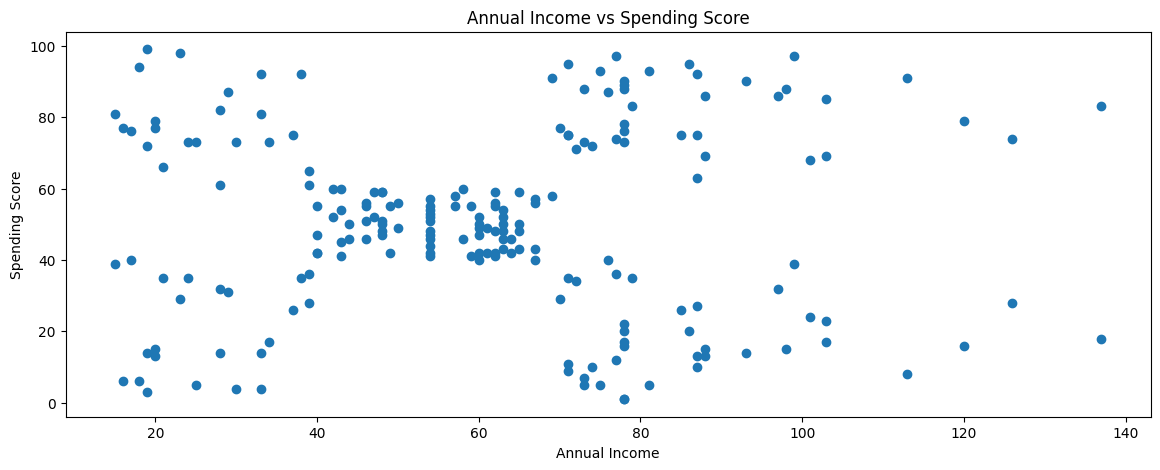

In [ ]:
#  Create a scatter plot with 'Annual Income' on X-axis and 'Spending Score' on Y-axis.
plt.figure(figsize = (14,5))
plt.scatter(data_2d['Annual Income'], data_2d['Spending Score'])
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

From the above scatter plot, we can anticipate a possibility of having 5 clusters. So for now, assume number of clusters i.e `K` to be `5`. In the upcoming section, we will discuss methods used to determine this `K` value.


Let us now determine the clusters for our 2D dataset using the steps given below:

1. Import `KMeans` class from `sklearn.clusters` module.

2. Create an object (say `kmeans_2d`) of the `KMeans` constructor and provide following inputs:

 - `n_clusters = 5`   
 - `random_state = 10`

3. Call the `fit()` function using the object of  `KMeans` class and pass the subset DataFrame `data_2d` as input.

4. Get the predicted clusters for the data points by calling the `predict()` function on `kmeans_2d` and pass the `data_2d` DataFrame.

5. Print the labels obtained after using `predict()` function.

In [ ]:
# Determine the clusters for 2D dataset.
from sklearn.cluster import KMeans
kmeans_2d = KMeans(n_clusters = 5, random_state = 10)
kmeans_2d.fit(data_2d)
labels_2d = kmeans_2d.predict(data_2d)
print(labels_2d)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 1 4 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 3 0 3 1 3 0 3 0 3 1 3 0 3 0 3 0 3 0 3 1 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3]


As you can see in the output, our 2D data is divided into 5 clusters labelled from `0` to `4`.

Let us add these predicted labels as a new column to our `data_2d` subset DataFrame.

In [ ]:
# Add the predicted labels to a column named 'Label'
#import warnings
#warnings.filterwarnings("ignore")

data_2d['Label'] = labels_2d
data_2d.head()

<ipython-input-13-77f61ecadc03>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2d['Label'] = labels_2d


,Annual Income,Spending Score,Label
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4


As the cluster of each data point is now obtained, let's display those clusters using `plt.scatter()` function again, but this one using the values of `labels_2d` to colour-code the clusters.

Also plot the cluster centers or centroids of these 5 clusters. Recall that the centroids can be obtained using `cluster_centers_` attribute.



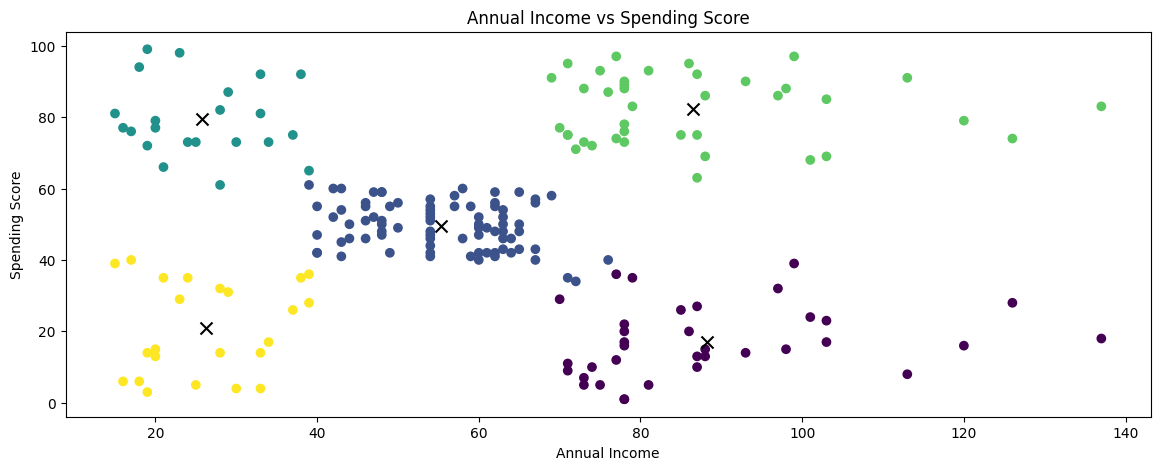

In [ ]:
#  Plot the datapoints corresponding to clusters
plt.figure(figsize = (14, 5))
plt.scatter(data_2d['Annual Income'], data_2d['Spending Score'], c = labels_2d)
plt.scatter(kmeans_2d.cluster_centers_[:, 0], kmeans_2d.cluster_centers_[:, 1], marker = 'x', c = 'black', s = 75)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In the above plot, observe the 5 clusters having different colours with their centroids.

You can also give your desired colour to the clusters in the following way:

1. Create a dictionary `color_dict`, where keys of this dictionary will be the predicted labels (in our case, it is `0` to `4`) and the values will be the desired colour for each label.
  ```python
  color_dict = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4: 'magenta'}
  ```

2. Create an empty list `color_list`.

3. Initiate a `for` loop which iterates for every `label` in `labels_2d`. Pass the current `label` as key to `color_dict` dictionary. This will return the corresponding value of that key i.e the colour from the `color_dict` dictionary. Append this colour to the `color_list` list.

4. Plot the scatter plot again as plotted in the above code cell, but this time the value of `c` attribute of `plt.scatter()` will be `color_list` obtained after the `for` loop.

In [ ]:

# Create a dictionary of colours.
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4: 'magenta'}

# Determine the colour for each predicted label using the dictionary.
# Store an empty list in a variable 'color_list'.
color_list = []
# Iterate through the labels in 'labels_2d' using a 'for' loop
for label in labels_2d:
  # Append the color for the label in 'color_dict' to the 'color_list'
  color_list.append(color_dict[label])

color_list

['magenta',
 'green',
 'magenta',
 'green',
 'magenta',
 'green',
 'magenta',
 'green',
 'magenta',
 'green',
 'magenta',
 'green',
 'magenta',
 'green',
 'magenta',
 'green',
 'magenta',
 'green',
 'magenta',
 'green',
 'magenta',
 'green',
 'magenta',
 'green',
 'magenta',
 'green',
 'magenta',
 'green',
 'magenta',
 'green',
 'magenta',
 'green',
 'magenta',
 'green',
 'magenta',
 'green',
 'magenta',
 'green',
 'magenta',
 'green',
 'magenta',
 'green',
 'magenta',
 'blue',
 'magenta',
 'green',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',


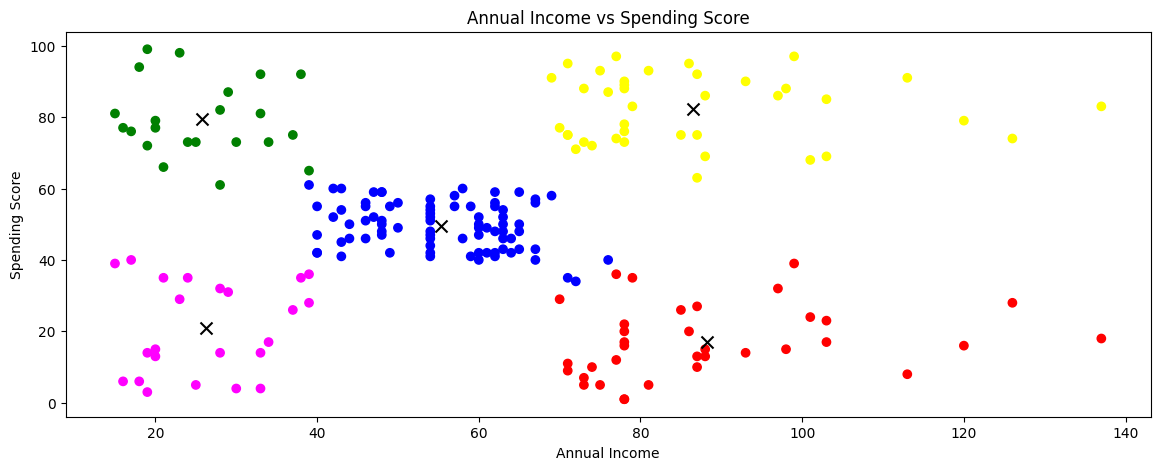

In [ ]:
# Give desired colors to the clusters

# Create a dictionary of colours.
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4: 'magenta'}

# Determine the colour for each predicted label using the dictionary.
# Store an empty list in a variable 'color_list'.
color_list = []
# Iterate through the labels in 'labels_2d' using a 'for' loop
for label in labels_2d:
  # Append the color for the label in 'color_dict' to the 'color_list'
  color_list.append(color_dict[label])

# Plot the 2D dataset with the desired colours for clusters.
plt.figure(figsize = (14, 5))
plt.scatter(data_2d['Annual Income'], data_2d['Spending Score'], c = color_list)
plt.scatter(kmeans_2d.cluster_centers_[:, 0], kmeans_2d.cluster_centers_[:, 1], marker = 'x', c ='black', s=75)
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


From the above scatter plot and based on the values of `color_dict` dictionary, we can say that:
- Label `0` cluster is in <font color=red>red</font> colour.
- Label `1` cluster is in <font color=blue>blue</font> colour.
- Label `2` cluster is in <font color=green>green</font> colour.
- Label `3` cluster is in <mark>yellow</mark> colour.
- Label `4` cluster is in <font color=magenta>magenta</font> colour.

But, *what can we conclude from these clusters? How these clusters can help us in identifying the target audience for a marketing strategy?* Let us try to interpret these clusters.

**Interpreting clusters:**

We obtained the following cluster of customers based on `Annual Income` and `Spending Score`:

1. **Red cluster (Label `0`):** These are the customers with the least income but more spending score.

2. **Blue cluster (Label `1`):**   Customers in this cluster are average in terms of income and spending.

3. **Green cluster (Label `2`):**  These are the customers with the highest income and  highest spending score.


4. **Yellow cluster (Label `3`):** These are the customers with the least income and least spending score.

5. **Magenta cluster (Label `4`):**  These are the customers with the good income but they spend less money.


The customers belonging to **green** cluster is a more interesting category as compared to other categories as they make much money and at the same time spend much as well. Thus, the marketing division of your company must send advertisements through emails or chats more often to this group compared to those in other clusters.

Suppose you want to obtain the Customer ID of the customers belonging to <font color = green><b>green </font></b>cluster so that you can send them advertisements related to a new product launch. Follow the steps given below to achieve this:

1. Obtain only those rows from the original DataFrame `mall_df` which satisfies the following condition:

  `data_2d['Label'] == 2`, as Label `2` customers belongs to green cluster.

2. Store this filtered DataFrame in a new DataFrame `cust_green`.

3. Print the number of customers in `cust_green`.

4. Print the values of `CustomerID` column of `cust_green` DataFrame in the form of a list, as we only need the Customer ID of green cluster customers.



In [ ]:
#  Obtain the customer IDs of the customers belonging to green cluster.
cust_green = mall_df[data_2d["Label"] == 3]
print('Number of customer in green cluster =', len(cust_green))
print('They are:', list(cust_green['CustomerID']))

Number of customer in green cluster = 39
They are: [124, 126, 128, 130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198, 200]


Thus, we obtained the Customer IDs of 39 customers who earn more and spend more. Similarly, you can obtain Customer IDs and other information of customers belonging to any other cluster also using the cluster labels.

In this way, the K-Means clustering performs customer segmentation to obtain a better understanding of customers which will eventually contribute in increasing the revenue of the company.

Now, let's just make sure that 5 is a good number of clusters by constructing an Elbow plot.

---

#### Activity 3: Selecting `k` Using Elbow Method

What we did in the previous activity was choosing the value of `k` i.e number of clusters by directly looking at the scatter plot.

What if we got more than 2 attributes or columns for clustering? For example, what if we also take the values of `Age` and `Gender` column into account? There will be 4 features in total and in such cases, visual inspection can not be used to determine the number of clusters.


There exists two methods to systematically determine the value of `k`.

1. Elbow Method
2. Silhouette Method


**Elbow Method:**

The Elbow method is used to determine the optimal value of `k` by calculating **Within-Cluster-Sum-of-Squares (WCSS)**.

**WCSS** is the sum of squared distance between each data point and the centroid in a cluster. Thus, it is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

WCSS is also known as **Inertia** and is given as,

\begin{align}
  WCSS = \sum_{i \in n} (d_i - \bar{c_i})^2
\end{align}

Where, $\bar{c_i}$ is the centroid for data point $d_i$.

For example, the following figure displays the distance between few points of a cluster from the cluster centroid.

<center><img src=https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/53ba1484-b134-432d-9c27-a1f1a085e64c.png></center>


The Elbow method works as follows:
1. First, the K-Means algorithm is randomly initialised  for a range of `K` values.

2. For each `K` value, WCSS or inertia is calculated.

3. Then, WCSS for each `K`  is plotted against their respective `K` value.

4. The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.

Let us first compute K-Means clustering for our 2D dataset `data_2d` by varying `K` from `1` to `10` clusters. Also, for each `K`, calculate WCSS using `inertia_` attribute of `Kmeans` object.













In [ ]:
# Calculate inertia for different values of 'K'.
# Create an empty list to store wcss value obtained for each 'K'
wcss = []

clusters = range(1, 11)
# Initiate a for loop that ranges from 1 to 10.
for k in clusters :
    # Inside for loop, perform K-Means clustering for current value of K. Use 'fit()' to train the model.
    kmeans = KMeans(n_clusters = k, random_state = 10)
    kmeans.fit(data_2d)
    # Find wcss for current K value using 'inertia_' attribute and append it to the empty list.
    wcss.append(kmeans.inertia_)

# Create a DataFrame with two columns.
# First column must contain K values from 1 to 10 and second column must contain wcss values obtained after the for loop.
wcss_data = pd.DataFrame({'Clusters': clusters, 'WCSS': wcss})
wcss_data

,Clusters,WCSS
0,1,270311.500000
1,2,184919.338724
2,3,106512.811017
3,4,74043.269507
4,5,44448.455448
5,6,37265.865205
6,7,31644.678414
7,8,25058.603651
8,9,23357.174496
9,10,20140.315490


You may observe that as the number of clusters (`K`) increases, WCSS decreases.

WCSS is highest when `K = 1` as every point in the dataset belongs to a single cluster. It will eventually become `0` when `K` is equal to the number of data points. This is because, as the number of cluster increases, the number of centroids also increases. Thus, distance between the centroids and the data points starts decreasing and it will eventually become `0` when each data point becomes a centroid.

Let us now create a line plot with `K` ranging from `1` to `10`  on $x$-axis and the WCSS values stored in `wcss` list on $y$-axis.

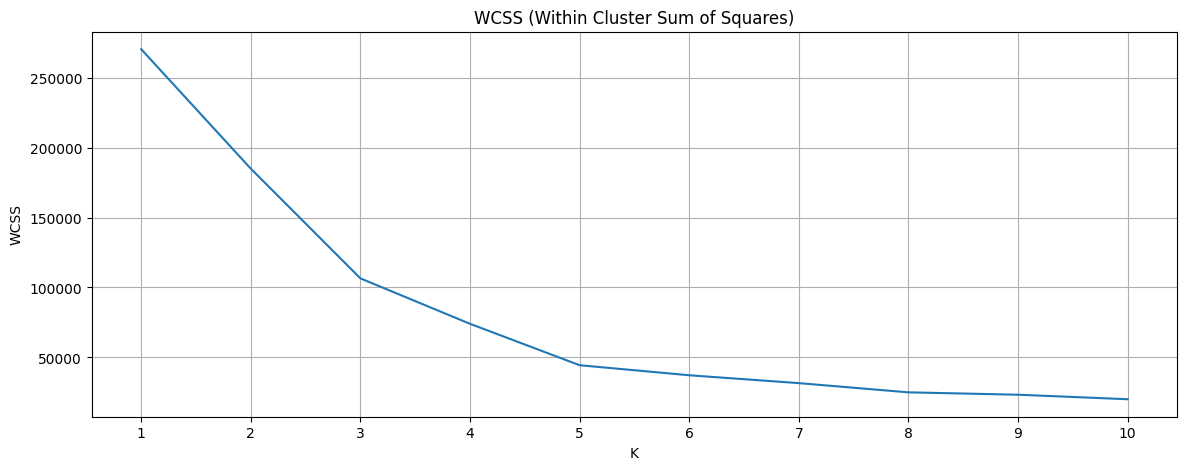

In [ ]:
#Plot WCSS vs number of clusters.
plt.figure(figsize=(14,5))
plt.title('WCSS (Within Cluster Sum of Squares)')
plt.plot(clusters, wcss)
plt.xlabel("K")
plt.ylabel("WCSS")
plt.grid()
plt.xticks(range(1,11))
plt.show()

From the above graph, you may observe that the decrease in WCSS or inertia after `K = 5` is not drastic. Thus, `K = 5` is the "Elbow" of this graph.

Hence, we can conclude that the optimal number of clusters for our 2D dataset is `5`. This means our initial guess was correct.

Another way to find out the optimal number of clusters is by using the **Silhouette Method**.

---

#### Activity 4: Silhouette Score Analysis



Just like the Elbow method uses WCSS to find the optimal value of `K`, the Silhouette method uses the **Silhouette score** to determine `K`. Before computing Silhouette score, we need to first understand **Silhouette Coefficient**.

**What is Silhouette Coefficient?**

- We know that the goal of clustering algorithms is to split the dataset into clusters of objects, such that:
  - The objects in the same cluster are similar or to each other as much as possible.
  - The objects belonging to different clusters are highly distinct from each other.

- The Silhouette coefficient of each data point measures how much that data point is similar or close to its own cluster and how much it is distinct from other clusters. Thus, Silhouette coefficient assesses the quality of clusters obtained from a clustering algorithm.

Consider a data point $i$. Let us learn how to calculate the Silhouette coefficient for $i$.


**Step 1: Compute $a(i)$**

It is defined as the average distance of data point $i$ with all other points in the same clusters. It is also known as *Mean Intra-cluster distance*.

  **Note:** Here, distance refers to the Euclidean distance.

<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/dfa627bd-9097-43df-b54b-0e327c417163.gif"/></center>


**Step 2: Compute $b(i)$**

It is defined as the average distance of the data point $i$ with all the points in the closest cluster to its cluster. It is also known as *Mean Inter-cluster distance*.
  
  **Note:** If there are more than one neighbouring clusters, then consider only the nearest cluster to the data point $i$.

<center><img src="https://s3-whjr-v2-prod-bucket.whjr.online/6a2b08d7-145c-4c9b-957f-9ab9be8dc685.gif"/></center>

  

**Step 3: Compute $s(i)$**

The Silhouette coefficient of data point $i$ is calculated as:

\begin{align}
  s(i) = \frac{b(i)-a(i)}{max(b(i),a(i))}
\end{align}

After calculating the Silhouette coefficient for each point, average it out to get the **Silhouette Score**.

The Silhouette scores  falls within the range `[-1, 1]`. Higher Silhouette scores indicates dense and well-separated clusters.

We can obtain the Silhouette score using the `silhouette_score` class of `sklearn.metrics` module.

> **Syntax of Silhouette Score:** `sklearn.metrics.silhouette_score(dataset, cluster_labels`)

> Where,
  - `dataset`: The dataset which needs to be clustered.
  - `cluster_labels`: The cluster labels predicted by clustering algorithm.


**Finding optimal value of `K`:**

Let us compute K-Means clustering for our 2D dataset `data_2d` by varying `K` from `2` to `10` clusters. Also, for each `K`, calculate Silhouette score using `silhouette_score` function. This is same as that done for Elbow method except that, we are calculating Silhouette score instead of WCSS.

**Note:** The `for` loop must iterate from `2` to `10` and not from `1` to `10` as done for Elbow method. If we try to calculate Silhouette score for `K = 1`, it will throw error. This is because, the Silhouette score calculates distance between neighbouring clusters, thus it's computation needs at least 2 clusters.

In [ ]:
#  Calculate inertia for different values of 'K'.
from sklearn.metrics import silhouette_score
# Create an empty list to store Silhouette scores obtained for each 'K'
sil_scores = []

clusters = range(2, 11)
# Initiate a for loop that ranges from 2 to 10.
for k in clusters:
    # Inside for loop, perform K-Means clustering for current value of K.
    # Use 'fit()'and 'predict()' to create clusters.

    kmeans_k = KMeans(n_clusters = k, random_state = 10)
    kmeans_k.fit(data_2d)
    cluster_labels = kmeans_k.predict(data_2d)
    # Find Silhouette score for current K value using 'silhouette_score()' function
    # and append it to the empty list.
    sil_scores.append(silhouette_score(data_2d, cluster_labels))

# Create a DataFrame with two columns.
# First column must contain K values from 2 to 10 and second column must contain Silhouette values obtained after the for loop.
sil_data = pd.DataFrame({'Clusters': clusters, 'Silhouette Scores': sil_scores})
sil_data

,Clusters,Silhouette Scores
0,2,0.377355
1,3,0.467668
2,4,0.493712
3,5,0.554644
4,6,0.538652
5,7,0.453290
6,8,0.454645
7,9,0.434480
8,10,0.438255


From the output, you may observe that the maximum Silhouette score is obtained at `K = 5`.

Let us now create a line plot with `K` ranging from `2` to `10`  on $x$-axis and the Silhouette scores stored in `sil_scores` list on $y$-axis.

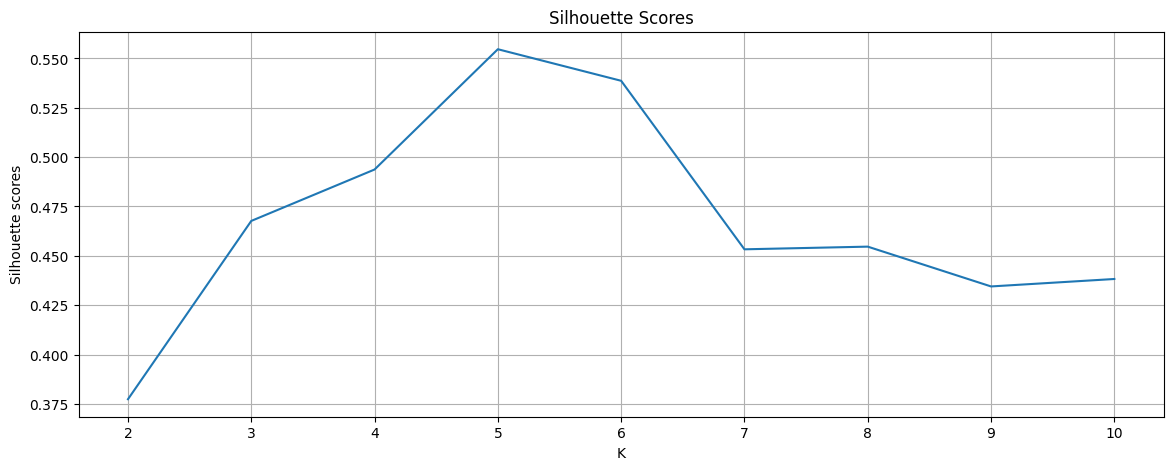

In [ ]:
#Plot Silhouette scores vs number of clusters.
plt.figure(figsize=(14,5))
plt.title('Silhouette Scores')
plt.plot(clusters, sil_scores)
plt.xlabel("K")
plt.ylabel("Silhouette scores")
plt.grid()
plt.xticks(range(2,11))
plt.show()

From the above graph, you may observe that the Silhouette score is at its peak at `K = 5`, after which it starts declining.

Thus, both Elbow method and Silhouette analysis confirms that the optimal number of clusters for our 2D dataset is indeed `5`.

